**Exercise 2**

Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.



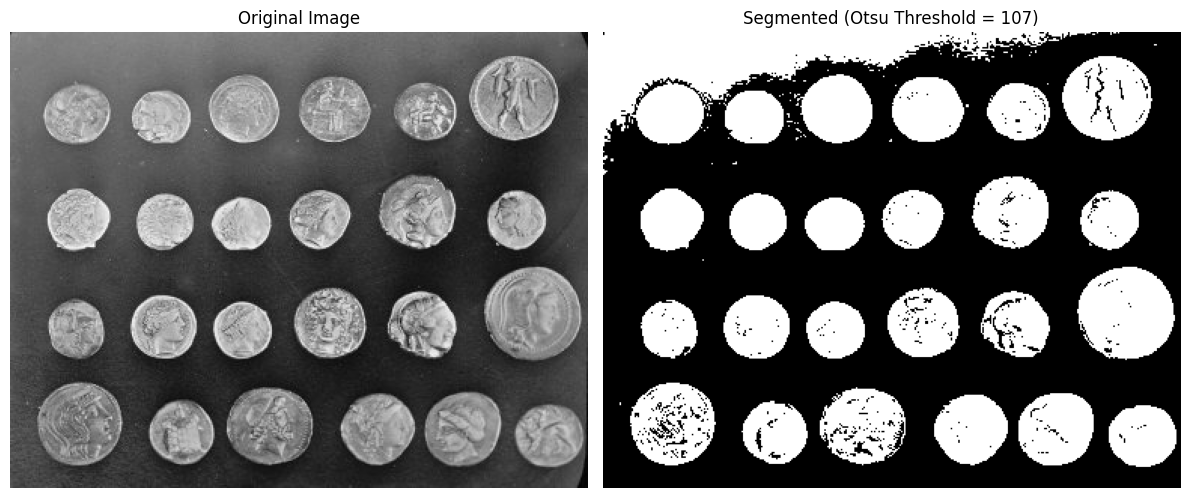

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.io import imshow

image = data.coins()  # grayscale image of coins on a background

# Apply Otsu's thresholding
thresh = threshold_otsu(image)
binary_mask = image > thresh  # foreground: True, background: False

# Display original and thresholded images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(binary_mask, cmap='gray')
axes[1].set_title(f"Segmented (Otsu Threshold = {thresh})")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Thresholding is a simple segmentation technique that splits the image into foreground and background based on pixel intensity.
We used Otsu’s method, which automatically finds the optimal threshold value that separates the two intensity classes by maximizing between-class variance.
In this case, the coins are segmented from the background because they have clearly distinct brightness.
However, connected coins or shadows may lead to imperfect segmentation, especially if foreground and background intensities overlap.

Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

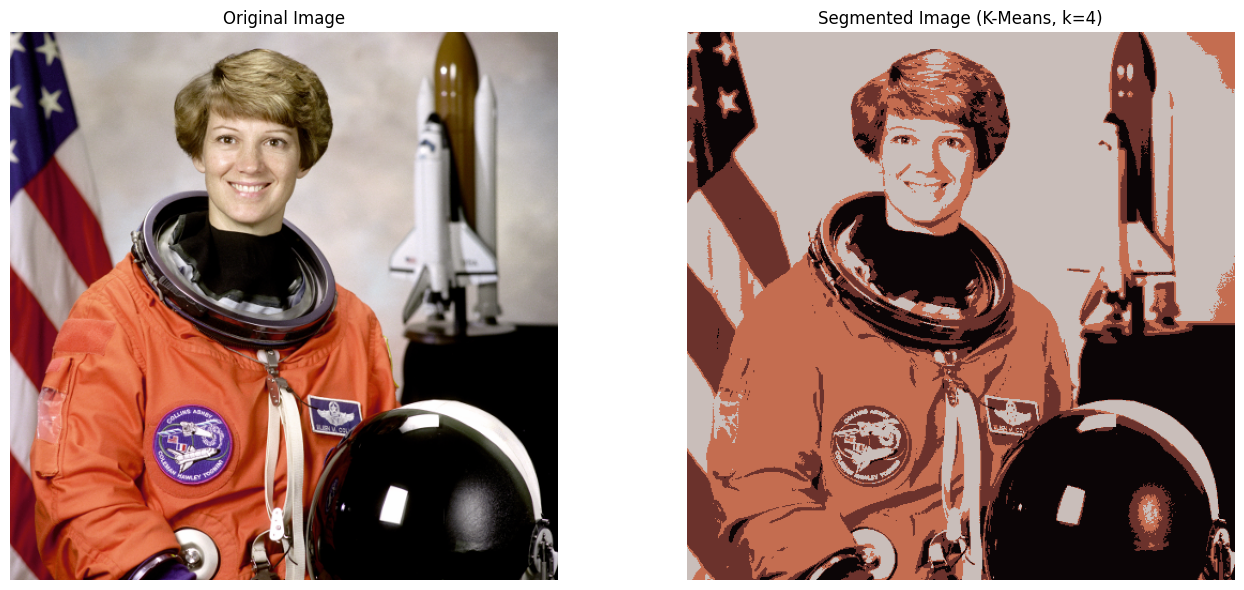

Number of unique colors in segmented image: 4
Unique RGB cluster centers:
[[ 11   5   6]
 [107  50  44]
 [196 109  80]
 [201 190 186]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans

# 1. Load a color image
image = data.astronaut()  # RGB image
rows, cols, channels = image.shape

# 2. Reshape image for clustering (flatten to [n_samples, n_features])
flat_image = image.reshape((-1, 3))  # Each pixel is a 3D vector (R,G,B)

# 3. Apply K-Means clustering
k = 4  # number of segments
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(flat_image)
labels = kmeans.labels_

# 4. Reconstruct segmented image from labels
segmented_img = kmeans.cluster_centers_[labels].reshape(image.shape).astype(np.uint8)

# 5. Display original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(segmented_img)
axes[1].set_title(f"Segmented Image (K-Means, k={k})")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Reshape segmented image to a list of RGB colors
unique_colors = np.unique(segmented_img.reshape(-1, 3), axis=0)

print(f"Number of unique colors in segmented image: {len(unique_colors)}")
print("Unique RGB cluster centers:")
print(unique_colors)


- K-Means clustering groups similar colors in the image, which works well for coarse segmentation based on color similarity.
- In the example, the astronaut image is grouped into k = 4 dominant color clusters, effectively reducing details but highlighting large regions (e.g., skin, clothing, background).
- Strengths: Unsupervised, simple, works on color directly.
- Limitations:No spatial information is used (so it may segment distant similar-color regions together).
- Not robust to textures or lighting variations.
- Increasing k can lead to oversegmentation.

Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

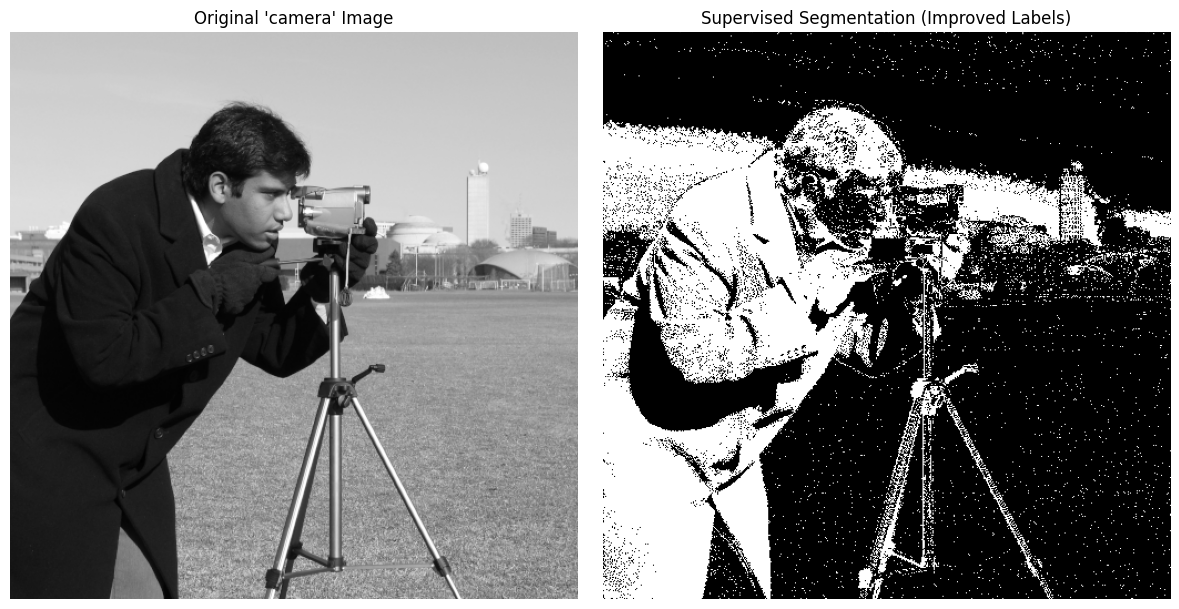

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier

# Load the 'camera' image (grayscale)
image = data.camera()
rows, cols = image.shape

# Extract intensity and LBP (texture)
intensity = image.ravel()
lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
texture = lbp.ravel()
X = np.column_stack((intensity, texture))

# Initialize labels to -1 (unlabeled)
labels = np.full(X.shape[0], -1)

# === MANUAL LABELING (based on pixel positions) ===

# Label 1: face/foreground (rectangle around face area)
for r in range(120, 150):
    for c in range(110, 140):
        labels[r * cols + c] = 1

# Label 0: background (sky area)
for r in range(30, 60):
    for c in range(100, 130):
        labels[r * cols + c] = 0

# Label 0: background (grass area)
for r in range(230, 260):
    for c in range(250, 280):
        labels[r * cols + c] = 0

# Train classifier
X_train = X[labels != -1]
y_train = labels[labels != -1]
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict for all pixels
y_pred = clf.predict(X)
segmented = y_pred.reshape((rows, cols))

# Display result
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original 'camera' Image")
axes[0].axis('off')

axes[1].imshow(segmented, cmap='gray')
axes[1].set_title("Supervised Segmentation (Improved Labels)")
axes[1].axis('off')

plt.tight_layout()
plt.show()


 Discussion: Supervised Segmentation

Effectiveness:

1. Learns from labeled examples to segment complex patterns.

2. Can use multiple features (intensity, texture, etc.).

3. Often more accurate than unsupervised methods.

Limitations:

1. Requires manual labeling, which can be time-consuming.

2. Sensitive to label quality — poor labels lead to poor results.

3. May produce noisy results if spatial context isn’t considered.

4. Needs good feature selection to perform wel

Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

Task 4: Supervised vs Unsupervised Segmentation

- Supervised Segmentation

---


Requires labeled data (you must annotate example pixels or regions).

Learns to classify pixels based on features (like intensity, texture).

Common methods: Random Forest, SVM, Deep Learning (CNNs).

Can produce accurate and task-specific segmentations.

Needs good training data and feature selection.

Takes more time due to labeling and training.

- Unsupervised Segmentation

---



Does not require labeled data.

Groups pixels based on similarity in features like color, intensity, or texture.

Common methods: K-Means, Thresholding, Watershed.

Easier and faster to apply.

Works well for simple patterns, but may fail on complex scenes.

Less accurate and can’t adapt to specific tasks.